In [1]:
%matplotlib inline

import matplotlib.ticker as ticker
import os
import cmaps
import salem
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from pylab import rcParams
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib.font_manager as fm

# matplotlib.use('nbAgg')

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/'
post_data_path = '/tera04/zhwei/xionghui/bedrock/'
shp_path = '/tera04/zhwei/xionghui/bedrock/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

print('python draw_l2_latlon.py')

# font = {'family': 'Times New Roman'}
font = {'family': 'Arial'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

font_properties = fm.FontProperties(weight='bold')

df = pd.read_csv(f'{data_path}csv/Global.csv')
print(data_path)

python draw_l2_latlon.py
/tera04/zhwei/xionghui/bedrock/run/500/


-90.0    0.0
-89.9    0.0
-89.8    0.0
-89.7    0.0
-89.6    0.0
        ... 
 89.5    0.0
 89.6    0.0
 89.7    0.0
 89.8    0.0
 89.9    0.0
Name: Area, Length: 1800, dtype: float64
-90.0    0.0
-89.9    0.0
-89.8    0.0
-89.7    0.0
-89.6    0.0
        ... 
 89.5    0.0
 89.6    0.0
 89.7    0.0
 89.8    0.0
 89.9    0.0
Name: Sbedrock, Length: 1800, dtype: float64


/tmp/ipykernel_3929036/2524015906.py:139: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


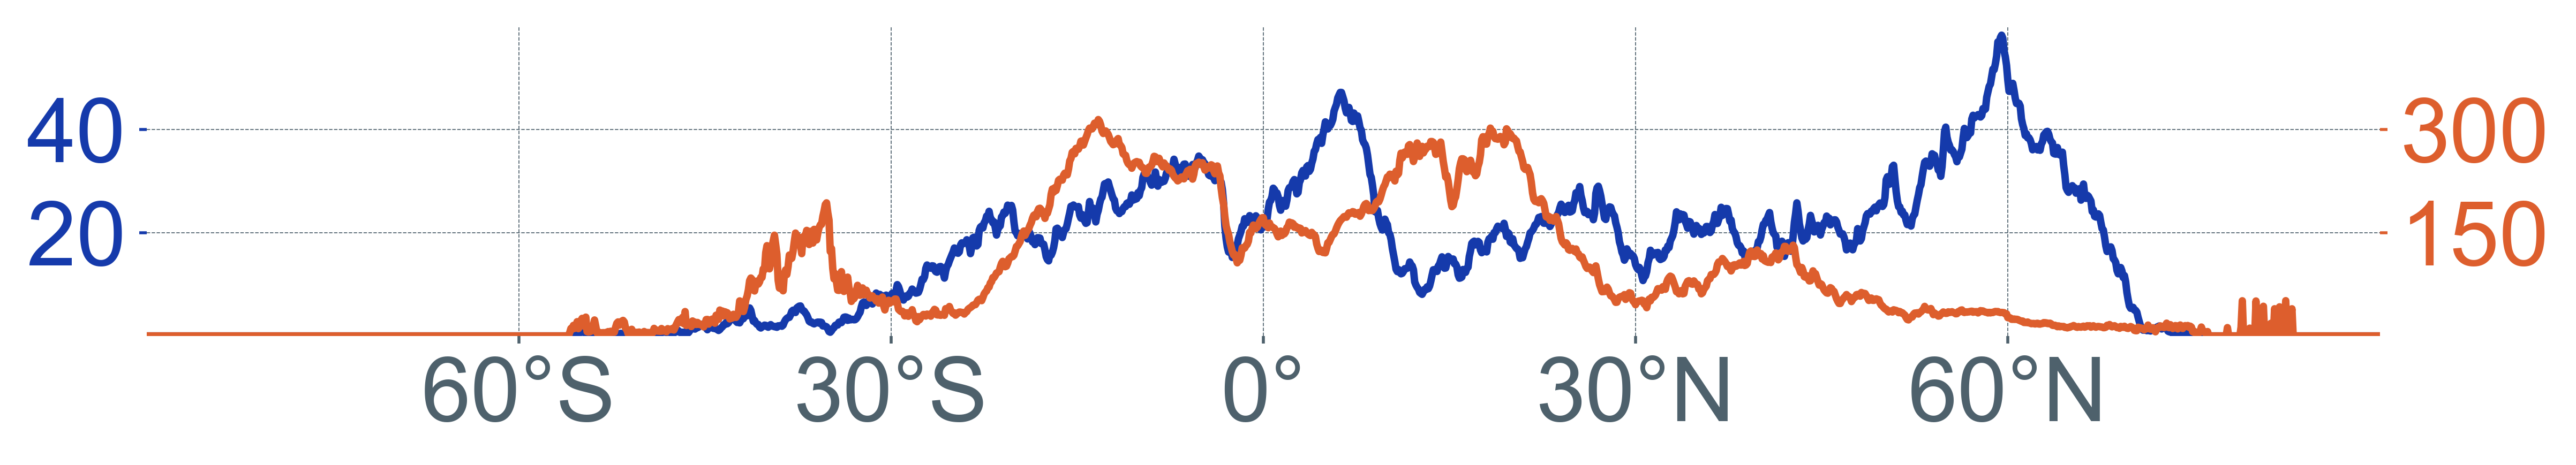

,Unnamed: 0,lat,lon,Sbedrock,PR_mean,ET_mean,Dbedrock_Frequency,Sr,Area,Koppen,IGBP,Continent,Subregion,Sovereignt,Continent_short,Subregion_short,Sovereignt_short
0,0,-55.847917,-67.627083,0.236460,692.439940,2.555584,1.0,0.236460,120515.621801,29,1,South America,South America,Chile,SA,SA,CHL
1,1,-55.847917,-67.622916,0.279453,691.950130,3.020087,1.0,0.279453,120515.621801,29,1,South America,South America,Chile,SA,SA,CHL
2,2,-55.847917,-67.618749,0.322446,691.460270,3.484589,1.0,0.322446,120515.621801,29,1,South America,South America,Chile,SA,SA,CHL
3,3,-55.847917,-67.614583,0.365440,690.970400,3.949091,1.0,0.365440,120515.621801,29,4,South America,South America,Chile,SA,SA,CHL
4,4,-55.847917,-67.610416,0.408433,690.480600,4.413592,1.0,0.408433,120515.621801,29,4,South America,South America,Chile,SA,SA,CHL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157069426,157069426,82.960414,-26.739583,39.301605,125.175170,107.267190,1.0,39.301605,26309.225697,29,1,North America,Northern America,Denmark,NaN,NaN,GRL
157069427,157069427,82.960414,-26.735417,39.884820,125.231810,107.503296,1.0,39.884820,26309.225697,29,1,North America,Northern America,Denmark,NaN,NaN,GRL
157069428,157069428,82.960414,-26.731250,40.468037,125.288445,107.739400,1.0,40.468037,26309.225697,29,1,North America,Northern America,Denmark,NaN,NaN,GRL
157069429,157069429,82.960414,-26.727083,41.051250,125.345085,107.975510,1.0,41.051250,26309.225697,29,1,North America,Northern America,Denmark,NaN,NaN,GRL


In [2]:
def plot_line(title, ax, x, y1, y2, color):
    ax.grid(ls = "--", lw = 0.25, color = "#4E616C")
    # y1 = y1.rolling(window = 5, min_periods = 0).mean()
    # y2 = y2.rolling(window = 20, min_periods = 0).mean()

    ax.plot(x, y1, mfc = "white",lw = 2, ms = 2, color = color[0], label=title[1])

    ax.set_ylim(0)
    
    if x.min() < -90:
        interval = 60
        xmin,xmax = -180,180
    else:
        interval = 30
        xmin,xmax = -90,90
    xlevel = np.arange(xmin, xmax+interval, interval)
    xlevel2 = np.arange(xmin+interval, xmax, interval)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(interval))
    ax.xaxis.set_ticks(xlevel2)

    ticks_degrees = xlevel2
    if x.min() < -90:
        tick_labels = [f"{abs(int(deg))}°{'E' if deg > 0 else ('W' if deg < 0 else '')}" for deg in ticks_degrees]
    else:
        tick_labels = [f"{abs(int(deg))}°{'N' if deg > 0 else ('S' if deg < 0 else '')}" for deg in ticks_degrees]
    ax.xaxis.set_ticklabels(tick_labels)
    ax.xaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 24)
    ax.set_xlim(xlevel[0],xlevel[-1])
    

    if x.min() < -90:
        interval = 10
    else:
        interval = 20
    y1level = np.arange(0,y1.max()+interval,interval)
    # print(y1level)
    y1level2 = np.arange(interval,y1.max(),interval)
    ax.set_ylim(0, y1level[-1])
    ax.yaxis.set_ticks(y1level2)
    ax.yaxis.set_ticklabels(int(j) for j in y1level2)
    ax.yaxis.set_tick_params(length = 2, color = color[0], labelcolor = color[0], labelsize = 24)

    ax2 = ax.twinx()

    interval = 150
    y2level = np.arange(0, y2.max() + interval, interval)
    y2level2 = np.arange(interval,y2.max(),interval)
    
    ax2.set_xlim(xlevel[0],xlevel[-1])
    ax2.set_ylim(0, y2level[-1])
    ax2.yaxis.set_ticks(y2level2)
    ax2.yaxis.set_ticklabels(int(j) for j in y2level2)
    ax2.yaxis.set_tick_params(length=2, color=color[1], labelcolor=color[1], labelsize=24)
    ax2.plot(x, y2, mfc = "white",lw = 2, ms = 2, color = color[1], label=title[1])

    
    # ax.axvline(x=0, color="#4E616C",lw = 0.2, linestyle='-')
    ax.spines["bottom"].set_edgecolor("#4E616C")

    for spine in ax.spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0)  
    
    
    for spine in ax2.spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0) 

    # y1 = y1.iloc[-1]
#     ax.text(x = ax.get_xlim()[0] - ax.get_xlim()[1]/20, y = ax.get_ylim()[1] + ax.get_ylim()[1]/5,
#             s = f'{title[0]}',
#             color = "#4E616C",
#             va = 'center',
#             ha = 'left',
#             size = 14
#             )
    
#     ax.text(x = ax.get_xlim()[1] - ax.get_xlim()[1]/3, y = ax.get_ylim()[1] - ax.get_ylim()[1]/10,
#             s = title[0].split('(')[0],
#             color = color[0],
#             va = 'center',
#             ha = 'left',
#             size = 12
#             )
    
#     y2 = y2.iloc[-1]
#     ax.text(x = ax.get_xlim()[1] - ax.get_xlim()[1]/10, y = ax.get_ylim()[1] + ax.get_ylim()[1]/5,
#             s = f'{title[1]}',
#             color = "#4E616C",
#             va = 'center',
#             ha = 'left',
#             size = 14
#             )
    
#     ax.text(x = -ax.get_xlim()[1]/8, y = ax.get_ylim()[1] - ax.get_ylim()[1]/10,
#             s = title[1].split('(')[0],
#             color = color[1],
#             va = 'center',
#             ha = 'left',
#             size = 12
#             )

fig = plt.figure(figsize=(18, 4), dpi=500)
fig.subplots_adjust(left=0.05, right=0.98, 
                bottom=0.14, top=0.95, hspace=0.8) 
gs = GridSpec(2, 48)

ax1 = fig.add_subplot(gs[0, :24])
df_area = df.copy()
lat = pd.Series((np.arange(-90, 90, 0.1)).round(2))
lat_area = df_area.groupby('lat')['Area'].sum().div(1e9)
lat_area_0p1 = lat_area.groupby(np.floor(lat_area.index * 10) / 10).sum()
lat_Sb = df_area.groupby('lat')['Sbedrock'].mean()
lat_Sb_0p1 = lat_Sb.groupby(np.floor(lat_Sb.index * 10) / 10).mean()
lat_area_df = lat_area_0p1.reindex(lat, fill_value=0)
lat_Sb_df = lat_Sb_0p1.reindex(lat, fill_value=0)
print(lat_area_df)
print(lat_Sb_df)
plot_line(["Area (\u00D7$10^3$$km^2$)","$S_{{bedrock}}$ (mm)"], 
ax1, lat_area_df.index, lat_area_df, lat_Sb_df, color = ["#153aab","#dd5e2d"])
color = ["#153aab","#fdcf41"]


# ax2 = fig.add_subplot(gs[1, :])
# df_area = df.copy()
# lon = pd.Series((np.arange(-180, 180, 0.1)).round(2))
# lon_area = df_area.groupby('lon')['Area'].sum().div(1e9)
# lon_area_0p1 = lon_area.groupby(np.floor(lon_area.index * 10) / 10).sum()
# lon_Sb = df_area.groupby('lon')['Sbedrock'].mean()
# lon_Sb_0p1 = lon_Sb.groupby(np.floor(lon_Sb.index * 10) / 10).mean()
# lon_area_df = lon_area_0p1.reindex(lon, fill_value=0)
# lon_Sb_df = lon_Sb_0p1.reindex(lon, fill_value=0)
# plot_line(["Area (\u00D7$10^3$$km^2$)","$S_{{bedrock}}$ (mm)"], 
# ax2, lon_area_df.index, lon_area_df, lon_Sb_df, color = ["#153aab","#dd5e2d"])

fig.patch.set_alpha(0)

plt.tight_layout()
plt.savefig(f"../fig/all/l2_lat.eps",dpi=500, bbox_inches='tight')
plt.show()
df_area

/tmp/ipykernel_3929036/2602670586.py:139: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


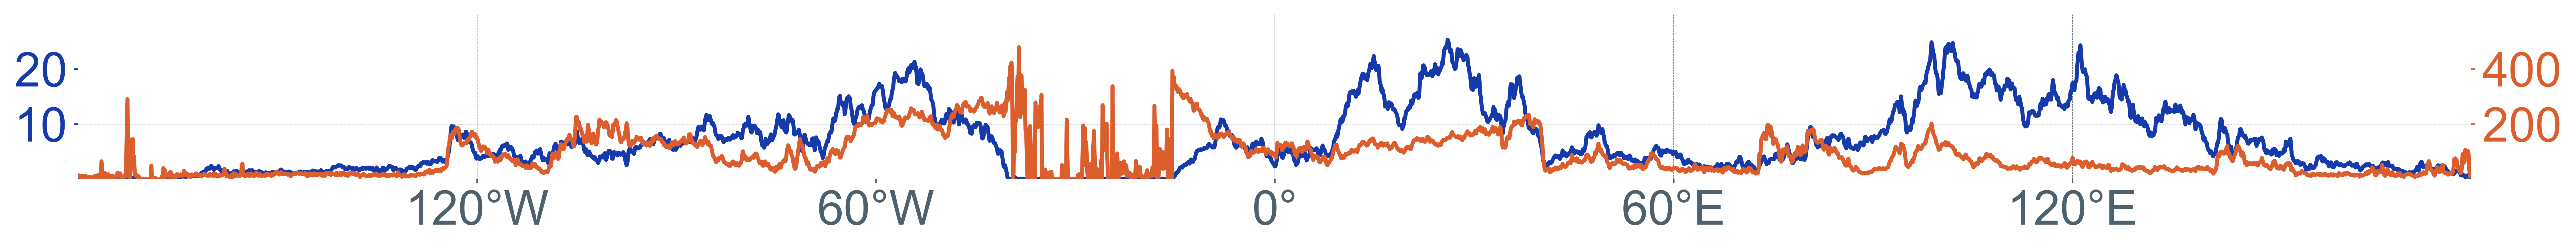

,Unnamed: 0,lat,lon,Sbedrock,PR_mean,ET_mean,Dbedrock_Frequency,Sr,Area,Koppen,IGBP,Continent,Subregion,Sovereignt,Continent_short,Subregion_short,Sovereignt_short
0,0,-55.847917,-67.627083,0.236460,692.439940,2.555584,1.0,0.236460,120515.621801,29,1,South America,South America,Chile,SA,SA,CHL
1,1,-55.847917,-67.622916,0.279453,691.950130,3.020087,1.0,0.279453,120515.621801,29,1,South America,South America,Chile,SA,SA,CHL
2,2,-55.847917,-67.618749,0.322446,691.460270,3.484589,1.0,0.322446,120515.621801,29,1,South America,South America,Chile,SA,SA,CHL
3,3,-55.847917,-67.614583,0.365440,690.970400,3.949091,1.0,0.365440,120515.621801,29,4,South America,South America,Chile,SA,SA,CHL
4,4,-55.847917,-67.610416,0.408433,690.480600,4.413592,1.0,0.408433,120515.621801,29,4,South America,South America,Chile,SA,SA,CHL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157069426,157069426,82.960414,-26.739583,39.301605,125.175170,107.267190,1.0,39.301605,26309.225697,29,1,North America,Northern America,Denmark,NaN,NaN,GRL
157069427,157069427,82.960414,-26.735417,39.884820,125.231810,107.503296,1.0,39.884820,26309.225697,29,1,North America,Northern America,Denmark,NaN,NaN,GRL
157069428,157069428,82.960414,-26.731250,40.468037,125.288445,107.739400,1.0,40.468037,26309.225697,29,1,North America,Northern America,Denmark,NaN,NaN,GRL
157069429,157069429,82.960414,-26.727083,41.051250,125.345085,107.975510,1.0,41.051250,26309.225697,29,1,North America,Northern America,Denmark,NaN,NaN,GRL


In [3]:
def plot_line(title, ax, x, y1, y2, color):
    ax.grid(ls = "--", lw = 0.25, color = "#4E616C")
    # y1 = y1.rolling(window = 5, min_periods = 0).mean()
    # y2 = y2.rolling(window = 20, min_periods = 0).mean()

    ax.plot(x, y1, mfc = "white",lw = 2, ms = 2, color = color[0], label=title[1])

    ax.set_ylim(0)
    
    if x.min() < -90:
        interval = 60
        xmin,xmax = -180,180
    else:
        interval = 30
        xmin,xmax = -90,90
    xlevel = np.arange(xmin, xmax+interval, interval)
    xlevel2 = np.arange(xmin+interval, xmax, interval)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(interval))
    ax.xaxis.set_ticks(xlevel2)

    ticks_degrees = xlevel2
    if x.min() < -90:
        tick_labels = [f"{abs(int(deg))}°{'E' if deg > 0 else ('W' if deg < 0 else '')}" for deg in ticks_degrees]
    else:
        tick_labels = [f"{abs(int(deg))}°{'N' if deg > 0 else ('S' if deg < 0 else '')}" for deg in ticks_degrees]
    ax.xaxis.set_ticklabels(tick_labels)
    ax.xaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 24)
    ax.set_xlim(xlevel[0],xlevel[-1])
    

    if x.min() < -90:
        interval = 10
    else:
        interval = 20
    y1level = np.arange(0,y1.max()+interval,interval)
    # print(y1level)
    y1level2 = np.arange(interval,y1.max(),interval)
    ax.set_ylim(0, y1level[-1])
    ax.yaxis.set_ticks(y1level2)
    ax.yaxis.set_ticklabels(int(j) for j in y1level2)
    ax.yaxis.set_tick_params(length = 2, color = color[0], labelcolor = color[0], labelsize = 24)

    ax2 = ax.twinx()

    interval = 200
    y2level = np.arange(0, y2.max() + interval, interval)
    y2level2 = np.arange(interval,y2.max(),interval)
    
    ax2.set_xlim(xlevel[0],xlevel[-1])
    ax2.set_ylim(0, y2level[-1])
    ax2.yaxis.set_ticks(y2level2)
    ax2.yaxis.set_ticklabels(int(j) for j in y2level2)
    ax2.yaxis.set_tick_params(length=2, color=color[1], labelcolor=color[1], labelsize=24)
    ax2.plot(x, y2, mfc = "white",lw = 2, ms = 2, color = color[1], label=title[1])

    
    # ax.axvline(x=0, color="#4E616C",lw = 0.2, linestyle='-')
    ax.spines["bottom"].set_edgecolor("#4E616C")

    for spine in ax.spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0)  
    
    
    for spine in ax2.spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0) 

    # y1 = y1.iloc[-1]
#     ax.text(x = ax.get_xlim()[0] - ax.get_xlim()[1]/20, y = ax.get_ylim()[1] + ax.get_ylim()[1]/5,
#             s = f'{title[0]}',
#             color = "#4E616C",
#             va = 'center',
#             ha = 'left',
#             size = 14
#             )
    
#     ax.text(x = ax.get_xlim()[1] - ax.get_xlim()[1]/3, y = ax.get_ylim()[1] - ax.get_ylim()[1]/10,
#             s = title[0].split('(')[0],
#             color = color[0],
#             va = 'center',
#             ha = 'left',
#             size = 12
#             )
    
#     y2 = y2.iloc[-1]
#     ax.text(x = ax.get_xlim()[1] - ax.get_xlim()[1]/10, y = ax.get_ylim()[1] + ax.get_ylim()[1]/5,
#             s = f'{title[1]}',
#             color = "#4E616C",
#             va = 'center',
#             ha = 'left',
#             size = 14
#             )
    
#     ax.text(x = -ax.get_xlim()[1]/8, y = ax.get_ylim()[1] - ax.get_ylim()[1]/10,
#             s = title[1].split('(')[0],
#             color = color[1],
#             va = 'center',
#             ha = 'left',
#             size = 12
#             )

fig = plt.figure(figsize=(18, 4), dpi=500)
fig.subplots_adjust(left=0.05, right=0.98, 
                bottom=0.14, top=0.95, hspace=0.8) 
gs = GridSpec(2, 48)

# ax1 = fig.add_subplot(gs[0, :24])
# df_area = df.copy()
# lat = pd.Series((np.arange(-90, 90, 0.1)).round(2))
# lat_area = df_area.groupby('lat')['Area'].sum().div(1e9)
# lat_area_0p1 = lat_area.groupby(np.floor(lat_area.index * 10) / 10).sum()
# lat_Sb = df_area.groupby('lat')['Sbedrock'].mean()
# lat_Sb_0p1 = lat_Sb.groupby(np.floor(lat_Sb.index * 10) / 10).mean()
# lat_area_df = lat_area_0p1.reindex(lat, fill_value=0)
# lat_Sb_df = lat_Sb_0p1.reindex(lat, fill_value=0)
# print(lat_area_df)
# print(lat_Sb_df)
# plot_line(["Area (\u00D7$10^3$$km^2$)","$S_{{bedrock}}$ (mm)"], 
# ax1, lat_area_df.index, lat_area_df, lat_Sb_df, color = ["#153aab","#dd5e2d"])
# color = ["#153aab","#fdcf41"]


ax2 = fig.add_subplot(gs[1, :])
df_area = df.copy()
lon = pd.Series((np.arange(-180, 180, 0.1)).round(2))
lon_area = df_area.groupby('lon')['Area'].sum().div(1e9)
lon_area_0p1 = lon_area.groupby(np.floor(lon_area.index * 10) / 10).sum()
lon_Sb = df_area.groupby('lon')['Sbedrock'].mean()
lon_Sb_0p1 = lon_Sb.groupby(np.floor(lon_Sb.index * 10) / 10).mean()
lon_area_df = lon_area_0p1.reindex(lon, fill_value=0)
lon_Sb_df = lon_Sb_0p1.reindex(lon, fill_value=0)
plot_line(["Area (\u00D7$10^3$$km^2$)","$S_{{bedrock}}$ (mm)"], 
ax2, lon_area_df.index, lon_area_df, lon_Sb_df, color = ["#153aab","#dd5e2d"])

fig.patch.set_alpha(0)

plt.tight_layout()
plt.savefig(f"../fig/all/l2_lon.eps",dpi=500, bbox_inches='tight')
plt.show()

df_area